In [16]:
capturas = pd.read_csv('dataset_limpio.csv')

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# EJERCICIO 1

In [18]:
capturas.head()

,Fecha,Latitud,Longitud,Ubicacion,No_DiaphorinasXtrampa,Month
0,2015-01-22,24.11564,-99.03734,177_THUE05-28-030-0415T01,0.0,1
1,2015-01-29,24.11564,-99.03734,177_THUE05-28-030-0415T01,0.0,1
2,2015-01-29,24.11562,-99.03560,177_THUE05-28-030-0415T02,0.0,1
3,2015-01-22,24.11562,-99.03560,177_THUE05-28-030-0415T02,0.0,1
4,2015-01-29,24.11726,-99.03528,177_THUE05-28-030-0415T03,0.0,1


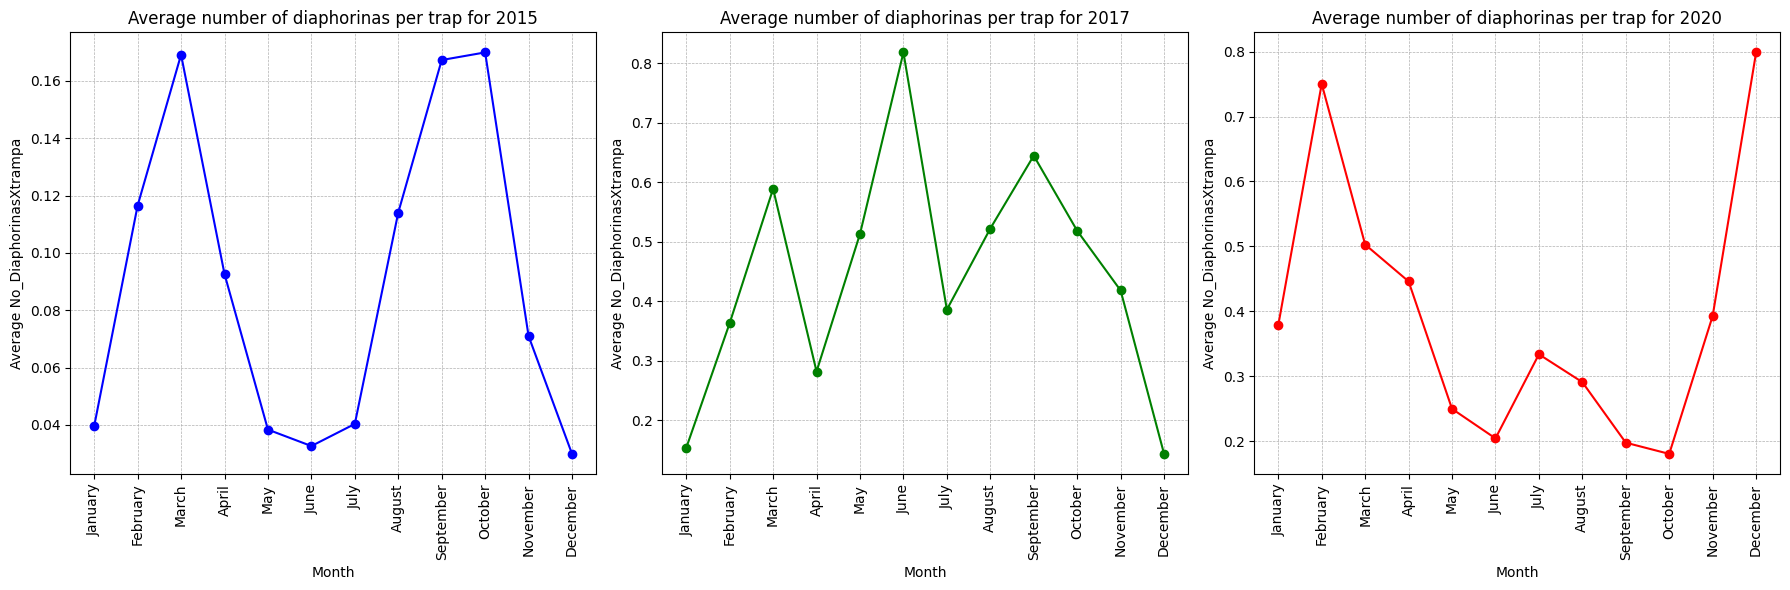

In [20]:
df_2015 = df[df['Year'] == 2015]
df_2017 = df[df['Year'] == 2017]
df_2020 = df[df['Year'] == 2020]

df_2015_monthly = df_2015.groupby('Month')['No_DiaphorinasXtrampa'].mean().reset_index()
df_2017_monthly = df_2017.groupby('Month')['No_DiaphorinasXtrampa'].mean().reset_index()
df_2020_monthly = df_2020.groupby('Month')['No_DiaphorinasXtrampa'].mean().reset_index()


plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.plot(df_2015_monthly['Month'], df_2015_monthly['No_DiaphorinasXtrampa'], marker='o', color='b')
plt.title('Average number of diaphorinas per trap for 2015')
plt.xlabel('Month')
plt.ylabel('Average No_DiaphorinasXtrampa')
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


plt.subplot(1, 3, 2)
plt.plot(df_2017_monthly['Month'], df_2017_monthly['No_DiaphorinasXtrampa'], marker='o', color='g')
plt.title('Average number of diaphorinas per trap for 2017')
plt.xlabel('Month')
plt.ylabel('Average No_DiaphorinasXtrampa')
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


plt.subplot(1, 3, 3)
plt.plot(df_2020_monthly['Month'], df_2020_monthly['No_DiaphorinasXtrampa'], marker='o', color='r')
plt.title('Average number of diaphorinas per trap for 2020')
plt.xlabel('Month')
plt.ylabel('Average No_DiaphorinasXtrampa')
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# EJERCICIO 2

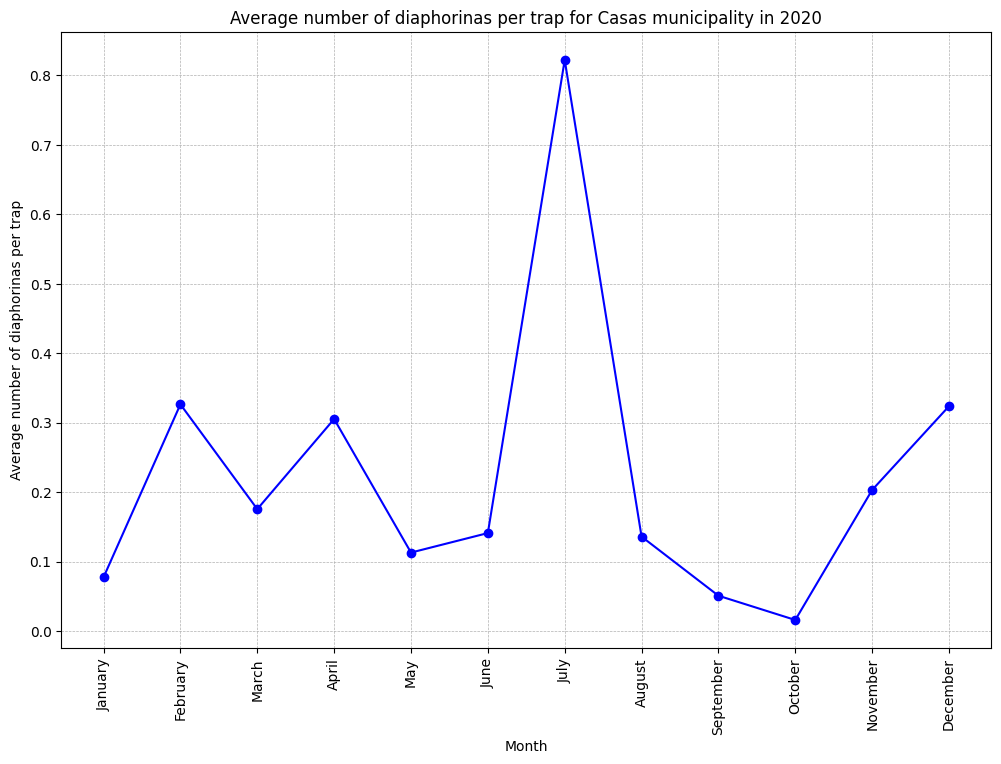

In [25]:
sheet_2020 = pd.read_excel('capturas_2015-2020.xlsx', sheet_name=6)
casas = sheet_2020[sheet_2020['Municipio'] == 'CASAS']
casas_monthly = padilla.groupby('Mes')['No_DiaphorinasXtrampa'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(casas_monthly['Mes'], casas_monthly['No_DiaphorinasXtrampa'], marker='o', color='b')
plt.title('Average number of diaphorinas per trap for Casas municipality in 2020')
plt.xlabel('Month')
plt.ylabel('Average number of diaphorinas per trap')
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# EJERCICIO 3

In [31]:
sheet_2015 = pd.read_excel('capturas_2015-2020.xlsx', sheet_name=0)
sheet_2015['Fecha'] = pd.to_datetime(sheet_2015['Fecha'], errors='coerce')

In [34]:
import pandas as pd
import numpy as np

data = []

for month in range(1, 13):
    month_data = sheet_2015[sheet_2015['Mes'] == month]
    monthly_means = month_data.groupby('Ubicacion')['No_DiaphorinasXtrampa'].mean()

    for location, mean in monthly_means.items():
        data.append({'Mes': month, 'Ubicacion': location, 'Average_No_Diaphorinas': mean})

placeholder = pd.DataFrame(data)

coef_disp = placeholder.groupby('Mes')['Average_No_Diaphorinas'].agg(lambda x: np.var(x) / np.mean(x)).reset_index(name='Indice de dispersion')
coef_cx = placeholder.groupby('Mes')['Average_No_Diaphorinas'].agg(lambda x: (np.var(x) / np.mean(x) - 1) / (np.sum(x) - 1)).reset_index(name='Coeficiente de Green')

monthly_summary = pd.merge(coef_disp, coef_cx, on='Mes', how='outer')
print(monthly_summary.head(20))


    Mes  Indice de dispersion  Coeficiente de Green
0     1              0.964859             -0.009288
1     2              1.299864              0.000330
2     3              1.822348              0.000656
3     4              0.870420             -0.000158
4     5              0.765993             -0.000811
5     6              1.436645              0.001701
6     7              1.611750              0.002006
7     8              2.679302              0.001877
8     9              3.118337              0.001740
9    10              4.228514              0.002381
10   11              2.043252              0.001644
11   12              2.128441              0.004010


# EJERCICIO 4

<Figure size 1200x800 with 0 Axes>

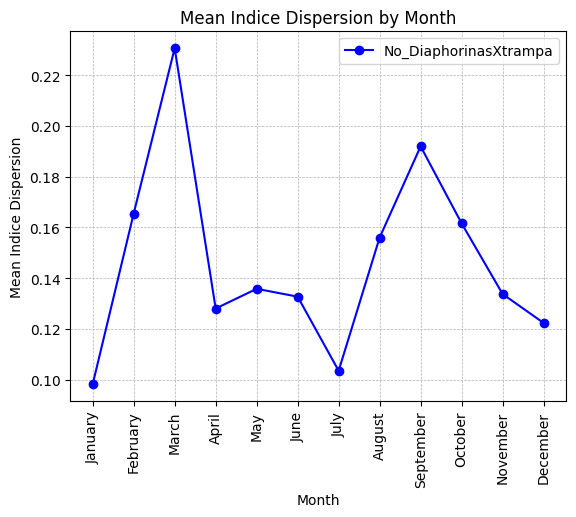

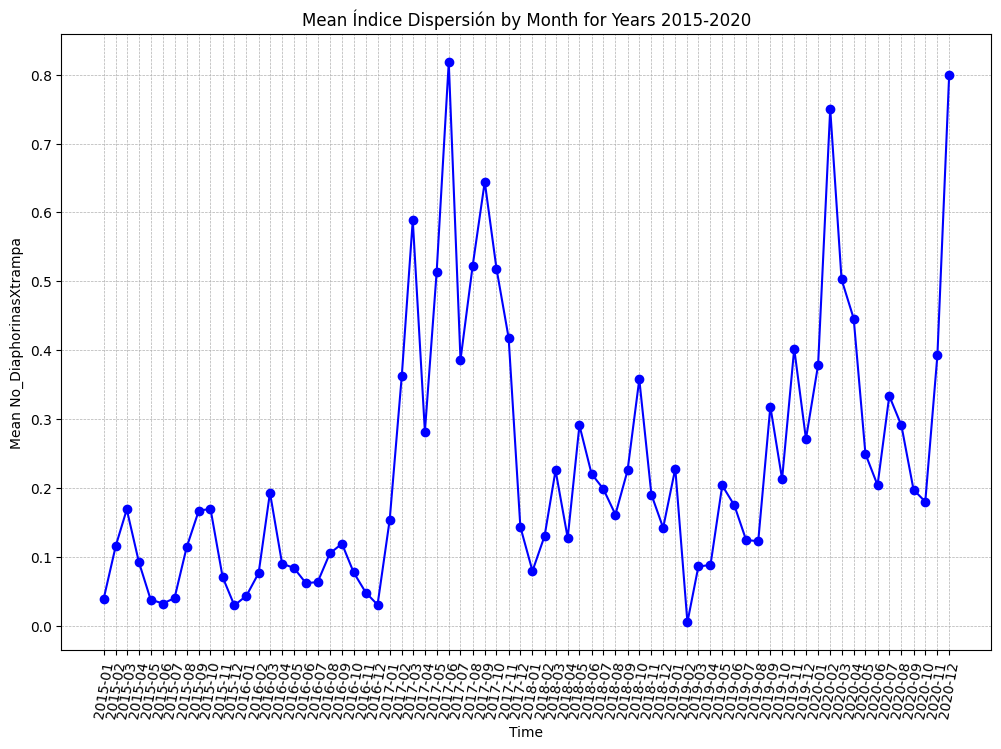

In [15]:
capturas['Fecha'] = pd.to_datetime(capturas['Fecha'])
capturas['Month'] = capturas['Fecha'].dt.month
capturas_monthly = capturas.groupby('Month')['No_DiaphorinasXtrampa'].agg('mean').reset_index()
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 8))
capturas_monthly.plot(x='Month', y='No_DiaphorinasXtrampa', kind='line', marker='o', color='b')
plt.title('Mean Indice Dispersion by Month')
plt.xlabel('Month')
plt.ylabel('Mean Indice Dispersion')
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

capturas['Year'] = capturas['Fecha'].dt.year
capturas['Month'] = capturas['Fecha'].dt.month
capturas_continuous = capturas.groupby(['Year', 'Month'])['No_DiaphorinasXtrampa'].mean().reset_index()
capturas_continuous['Time'] = capturas_continuous['Year'].astype(str) + '-' + capturas_continuous['Month'].astype(str).str.zfill(2)
capturas_continuous['Time'] = pd.to_datetime(capturas_continuous['Time'])

plt.figure(figsize=(12, 8))
plt.plot(capturas_continuous['Time'], capturas_continuous['No_DiaphorinasXtrampa'], marker='o', color='b')
plt.title('Mean Índice Dispersión by Month for Years 2015-2020')
plt.xlabel('Time')
plt.ylabel('Mean No_DiaphorinasXtrampa')
plt.xticks(ticks=capturas_continuous['Time'], labels=[f"{date.year}-{date.month:02d}" for date in capturas_continuous['Time']], rotation=80)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


# EJERCICIO 5

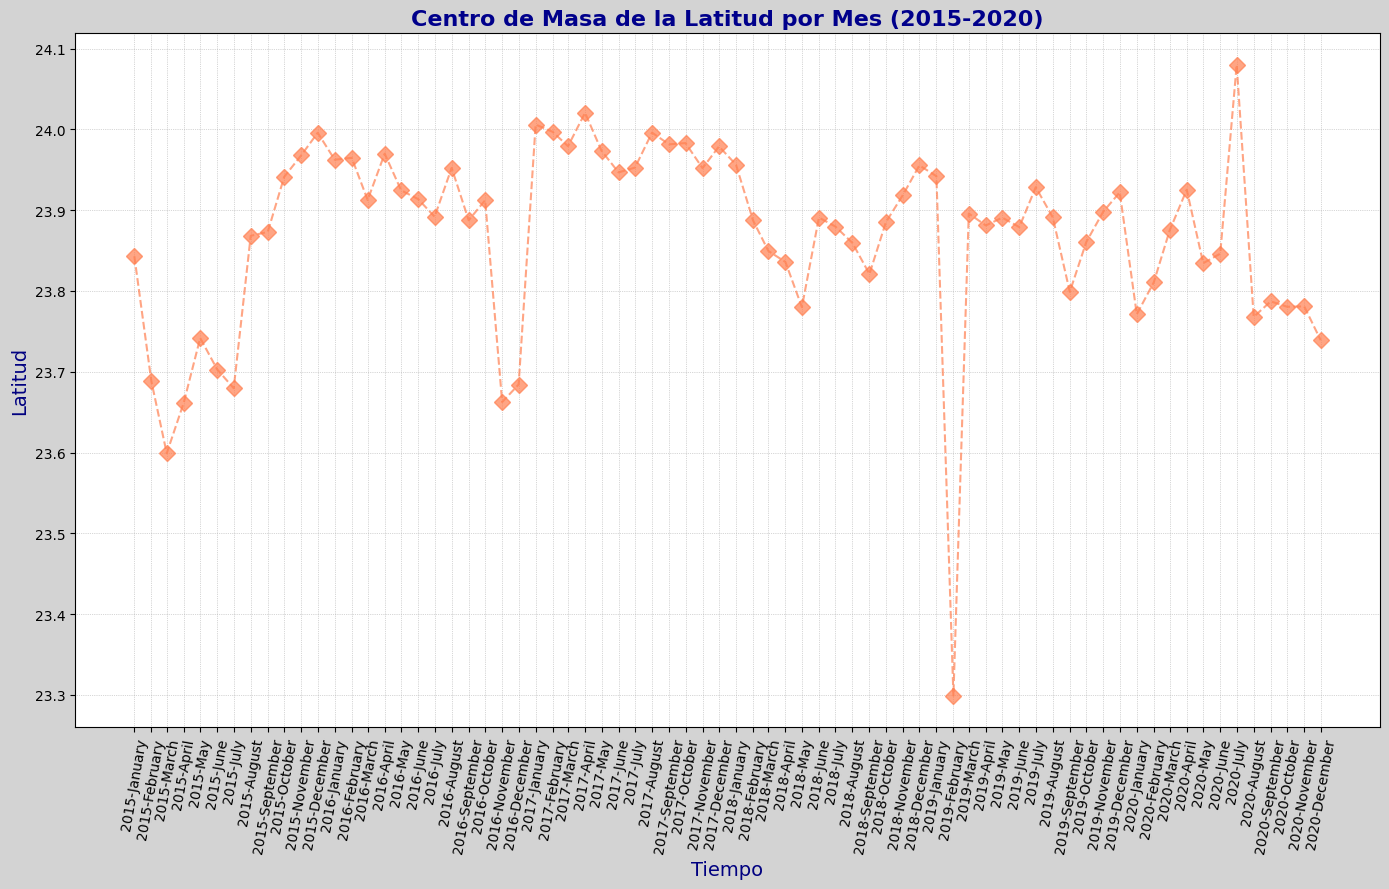

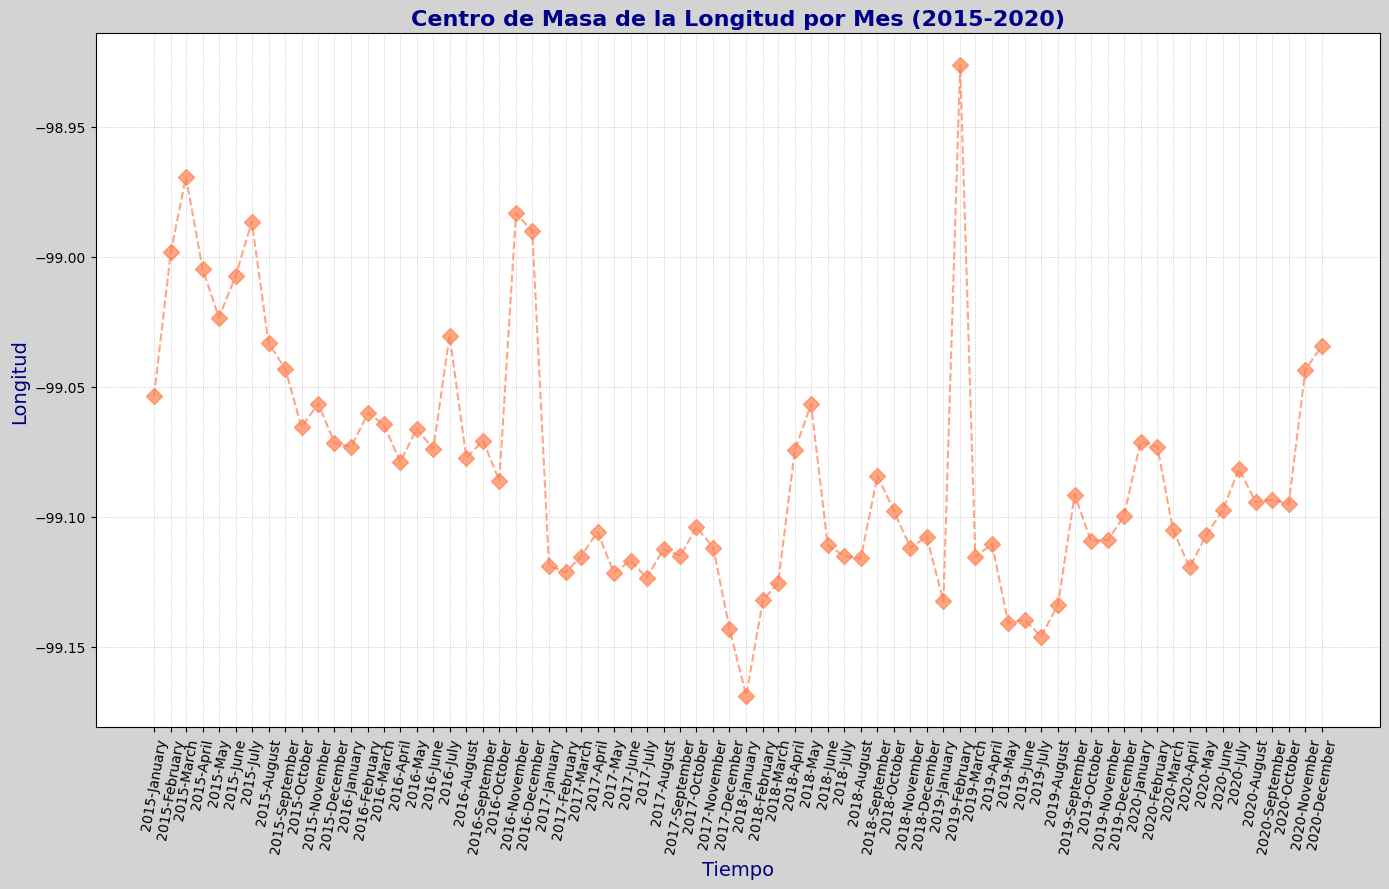

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

capturas['Fecha'] = pd.to_datetime(capturas['Fecha'])
capturas['Mes'] = capturas['Fecha'].dt.month
capturas['Año'] = capturas['Fecha'].dt.year

grouped_data = capturas.groupby(['Año', 'Mes'])[['No_DiaphorinasXtrampa', 'Latitud', 'Longitud']]

latitude_mass_center = grouped_data.apply(lambda x: (x['No_DiaphorinasXtrampa'] * x['Latitud']).sum() / x['No_DiaphorinasXtrampa'].sum()).reset_index(name='Centro_Latitud')
longitude_mass_center = grouped_data.apply(lambda x: (x['Longitud'] * x['No_DiaphorinasXtrampa']).sum() / x['No_DiaphorinasXtrampa'].sum()).reset_index(name='Centro_Longitud')

def create_time_series(data_frame, value_column, title, ylabel):
    fig, ax = plt.subplots(figsize=(14, 9), facecolor='lightgrey')
    data_frame['Tiempo'] = data_frame['Año'].astype(str) + '-' + data_frame['Mes'].astype(str).str.zfill(2)
    data_frame['Tiempo'] = pd.to_datetime(data_frame['Tiempo'])
    
    ax.plot(data_frame['Tiempo'], data_frame[value_column], marker='D', linestyle='--', color='coral', markersize=8, alpha=0.7)
    
    ax.set_title(title, fontsize=16, fontweight='bold', color='darkblue')
    ax.set_xlabel('Tiempo', fontsize=14, color='navy')
    ax.set_ylabel(ylabel, fontsize=14, color='navy')
    ax.tick_params(axis='x', rotation=80)
    
    month_labels = data_frame['Año'].astype(str) + '-' + data_frame['Mes'].apply(lambda x: month_names[x-1])
    ax.set_xticks(data_frame['Tiempo'])
    ax.set_xticklabels(month_labels, fontsize=10, color='black')
    
    ax.grid(True, linestyle=':', linewidth=0.5)
    plt.tight_layout()
    plt.show()

create_time_series(latitude_mass_center, 'Centro_Latitud', 'Centro de Masa de la Latitud por Mes (2015-2020)', 'Latitud')
create_time_series(longitude_mass_center, 'Centro_Longitud', 'Centro de Masa de la Longitud por Mes (2015-2020)', 'Longitud')
